## Google Playstore Case Study

### Problem Statement

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:

- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


In [1]:
import pandas as pd , numpy as np

In [2]:
inp0 = pd.read_csv("D:\\Upgrad\\module_5\\Case Study Notebook\\googleplaystore_v2.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Data Handling and Cleaning
The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

- For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
- Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column

In [4]:
inp1 = inp0[~inp0.Rating.isnull()]
inp1.shape

(9367, 13)

In [5]:
inp1.Rating.isnull().sum()

0

In [6]:
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
inp1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [8]:
inp1[(inp1["Android Ver"].isnull() & (inp1.Category == "1.9"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
inp1 = inp1[~(inp1["Android Ver"].isnull() & (inp1.Category == "1.9"))]

In [10]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [11]:
inp1['Android Ver'].mode()

0    4.1 and up
dtype: object

In [12]:
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [13]:
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [14]:
inp1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [15]:
inp1['Android Ver'].isnull().sum()

0

In [16]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [17]:
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
8.1.01                   1
8.9                      1
1.74                     1
4.16.2                   1
1.0.612933               1
Name: Current Ver, Length: 2638, dtype: int64

In [18]:
inp1['Current Ver'].mode()[0]

'Varies with device'

In [19]:
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [20]:
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
8.1.01                   1
8.9                      1
1.74                     1
4.16.2                   1
1.0.612933               1
Name: Current Ver, Length: 2638, dtype: int64

In [21]:
inp1['Price'].mode()

0    0
dtype: object

In [22]:
inp1.Price.value_counts()

0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$18.99       1
$1.61        1
$19.40       1
$4.84        1
$1.75        1
Name: Price, Length: 73, dtype: int64

In [23]:
inp1.Price = inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

In [24]:
inp1.Price.dtype

dtype('float64')

In [25]:
inp1.Price.value_counts()

0.00     8719
2.99      114
0.99      107
4.99       70
1.99       59
         ... 
1.61        1
4.60        1
2.90        1
39.99       1
14.00       1
Name: Price, Length: 73, dtype: int64

In [26]:
inp1.Reviews.value_counts()

2           83
3           78
5           74
4           74
1           67
            ..
1028794      1
25623548     1
17506        1
5291         1
981995       1
Name: Reviews, Length: 5992, dtype: int64

In [27]:
inp1.Reviews = inp1.Reviews.astype("int32")

In [28]:
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [29]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [30]:
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [31]:
def clean_installs(val):
    return int(val.replace(',','').replace('+',''))

In [32]:
clean_installs("30,000+")

30000

In [33]:
inp1.Installs = inp1.Installs.apply(clean_installs)

In [34]:
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [35]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [36]:
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

### Sanity Checks
The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.

In [37]:
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [38]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [39]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]

In [40]:
inp1[(inp1.Type == 'Free') & (inp1.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [41]:
inp1.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#BoxPlot



In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

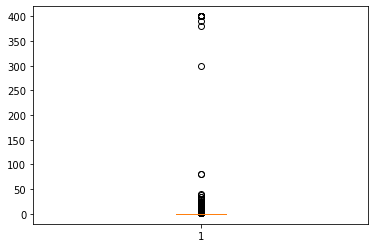

In [43]:
plt.boxplot(inp1.Price)
plt.show()

In [44]:
inp1[inp1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [45]:
inp1 = inp1[inp1.Price < 200]

In [46]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

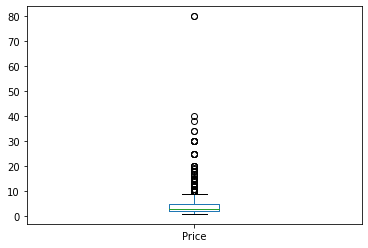

In [47]:
inp1[inp1.Price > 0].Price.plot.box()

In [48]:
inp1[inp1.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [49]:
inp1 = inp1[inp1.Price<=30]
inp1.shape

(9338, 13)

#Histogram for Reviews

In [50]:
?plt.hist

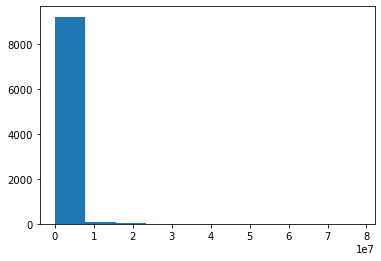

In [51]:
plt.hist(inp1.Reviews)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a601d1a970>,
 'caps': [<matplotlib.lines.Line2D at 0x1a601d1a8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a601c77100>],
 'medians': [<matplotlib.lines.Line2D at 0x1a601d3c640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a601d3cd90>],
 'means': []}

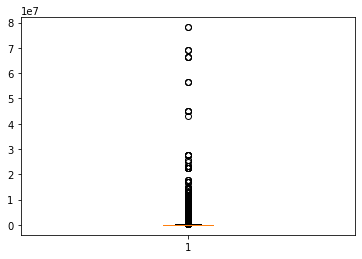

In [52]:
plt.boxplot(inp1.Reviews)

In [53]:
inp1[inp1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [54]:
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

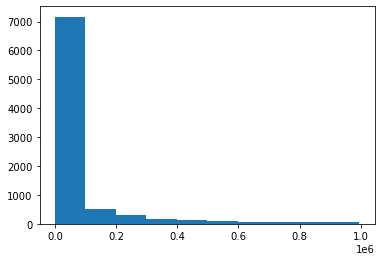

In [55]:
plt.hist(inp1.Reviews)
plt.show()

In [56]:
inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a601d67910>,
 'caps': [<matplotlib.lines.Line2D at 0x1a601d67fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a601d675b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a601d736d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a601d73a30>],
 'means': []}

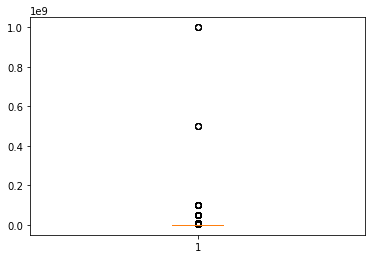

In [57]:
plt.boxplot(inp1.Installs)

In [58]:
inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(8624, 13)

In [59]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

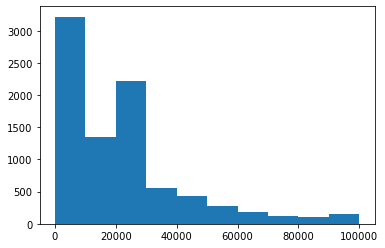

In [60]:
plt.hist(inp1.Size)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a602e0b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a602e190d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a602e0b670>],
 'medians': [<matplotlib.lines.Line2D at 0x1a602e19790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a602e19af0>],
 'means': []}

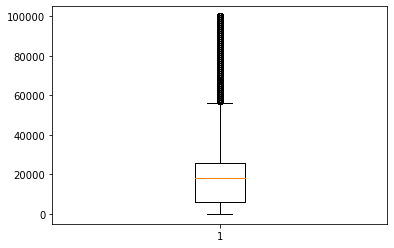

In [61]:
plt.boxplot(inp1.Size)

###Data Analysis t0 answer business question

In [62]:
import warnings
warnings.filterwarnings('ignore')

distribution of the ratings

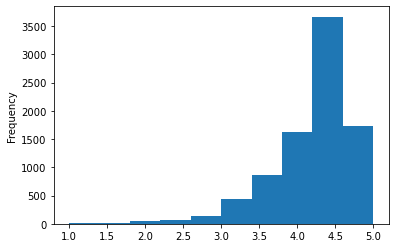

In [63]:
inp1.Rating.plot.hist()
plt.show()

In [64]:
import seaborn as sns

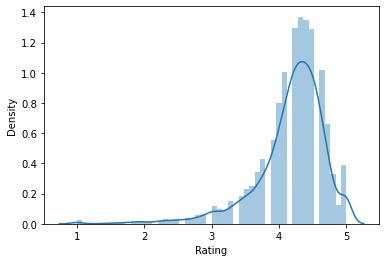

In [65]:
sns.distplot(inp1.Rating)
plt.show()

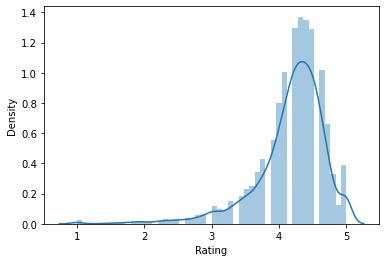

In [66]:
sns.distplot(inp1.Rating,rug=False,hist=True)
plt.show()

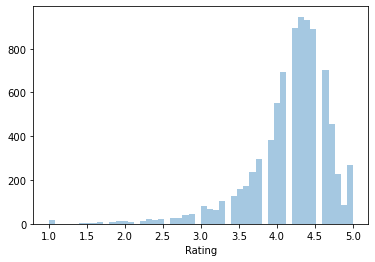

In [67]:

sns.distplot(inp1.Rating,kde = False)
plt.show()

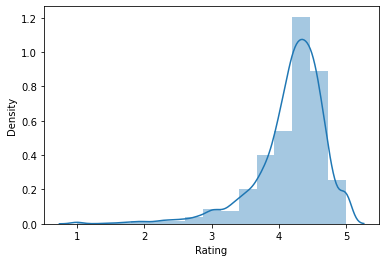

In [68]:
sns.distplot(inp1.Rating,bins=15)
plt.show()

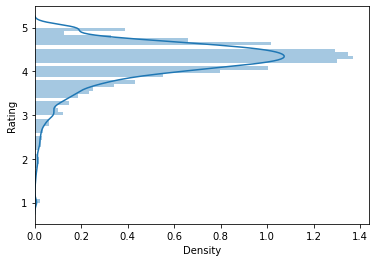

In [69]:
sns.distplot(inp1.Rating,vertical=True)
plt.show()

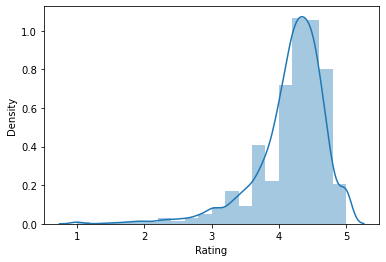

In [70]:
sns.distplot(inp1.Rating,bins=20)
plt.show()

In [71]:
inp1['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [72]:
inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+','Unrated'])]

In [73]:
inp1.shape

(8620, 13)

In [74]:
inp1.reset_index(inplace=True,drop=True)

In [75]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int64  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 841.9+ KB


In [76]:
inp1['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

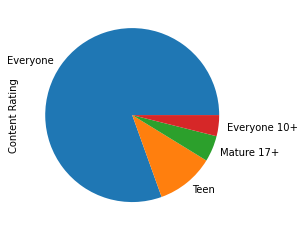

In [77]:
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

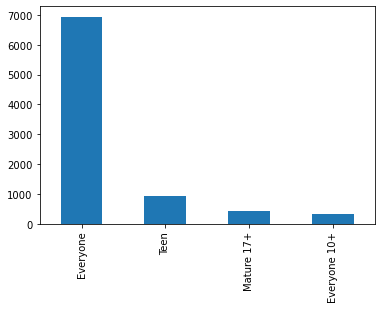

In [78]:
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

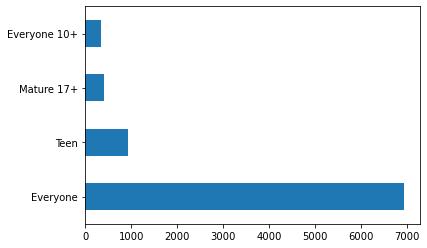

In [79]:
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

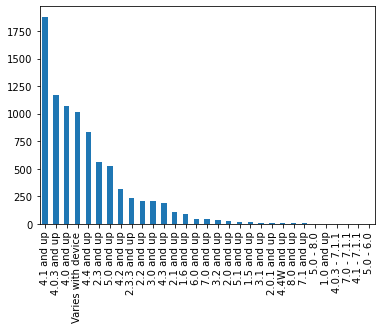

In [80]:
inp1['Android Ver'].value_counts().plot.bar()
plt.show()

Scatter Plot - size vs Rating

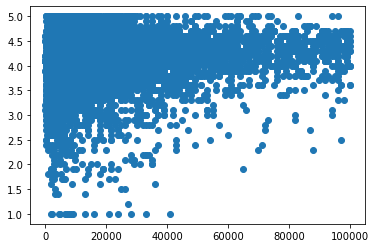

In [81]:
plt.scatter(inp1.Size,inp1.Rating)
plt.show()

In [82]:
sns.set_style('white')

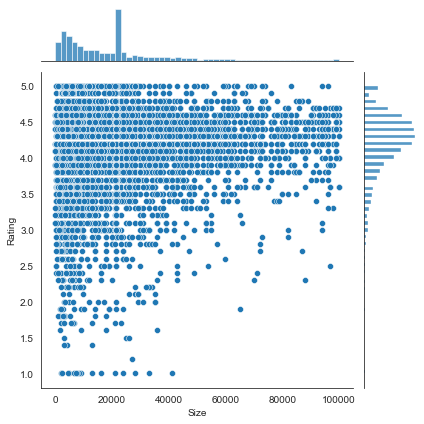

In [83]:
sns.jointplot(inp1.Size,inp1.Rating)
plt.show()

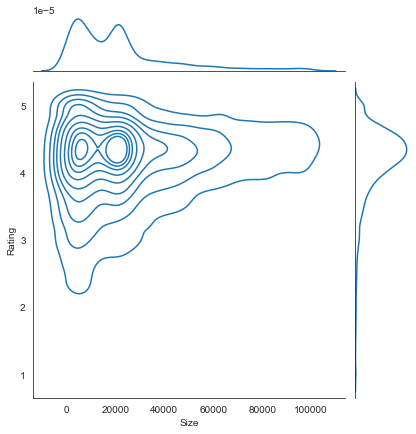

In [84]:
sns.jointplot(inp1.Size, inp1.Rating, kind = 'kde')
plt.show()

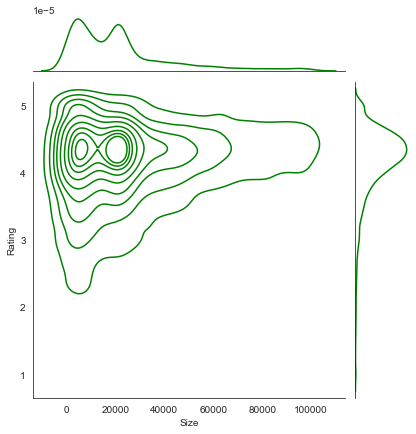

In [85]:
sns.jointplot(inp1.Size, inp1.Rating, kind = 'kde',color = 'g')
plt.show()

Looking at all numeric column together - pair plot

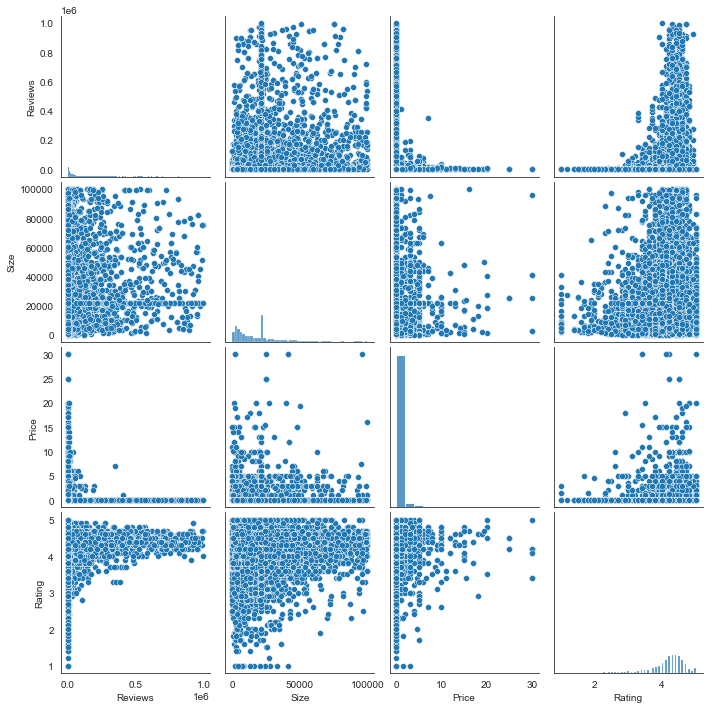

In [86]:
sns.pairplot(inp1[['Reviews','Size','Price','Rating']])
plt.show()

### Content Rating vs Rating

<AxesSubplot:xlabel='Content Rating'>

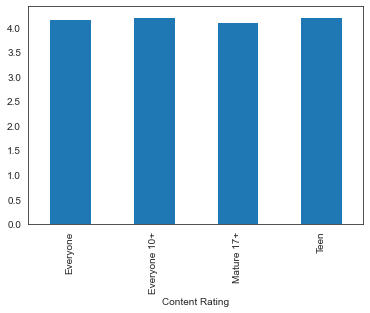

In [87]:
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

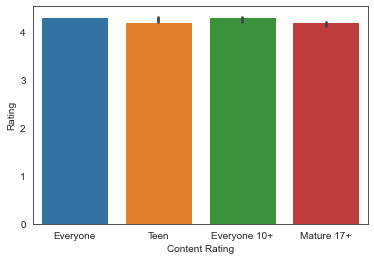

In [88]:
sns.barplot(data=inp1,x='Content Rating' , y='Rating',estimator=np.median)
plt.show()

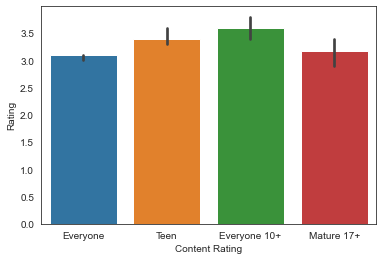

In [89]:
sns.barplot(data=inp1,x='Content Rating' , y='Rating',estimator=lambda x: np.quantile(x,0.05))
plt.show()

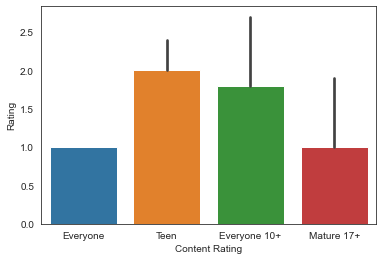

In [90]:
sns.barplot(data=inp1,x='Content Rating' , y='Rating',estimator=np.min)
plt.show()

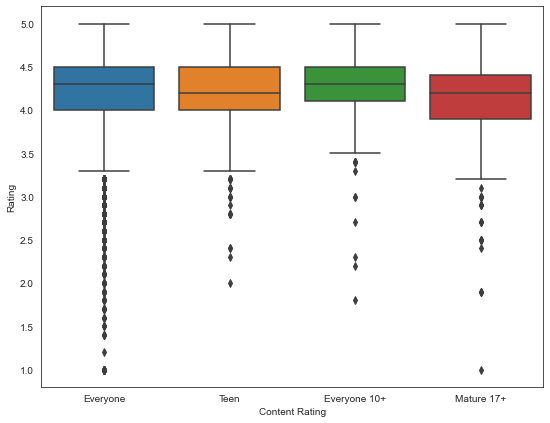

In [91]:
plt.figure(figsize=[9,7])
sns.boxplot(inp1['Content Rating'],inp1.Rating)
plt.show()

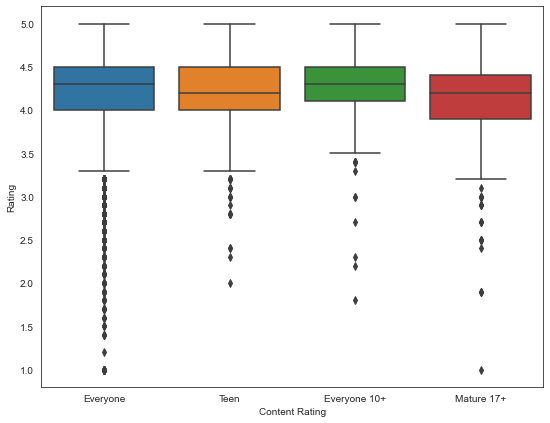

In [92]:
plt.figure(figsize=[9,7])
sns.boxplot(inp1['Content Rating'],inp1.Rating)
plt.show()

In [93]:
inp1['Genres'].value_counts()

Tools                          694
Entertainment                  508
Education                      464
Medical                        344
Finance                        315
                              ... 
Music & Audio;Music & Video      1
Parenting;Brain Games            1
Entertainment;Education          1
Tools;Education                  1
Communication;Creativity         1
Name: Genres, Length: 115, dtype: int64

In [94]:
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]

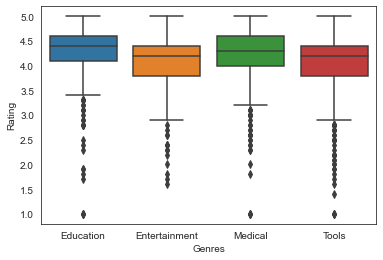

In [95]:
sns.boxplot(inp5['Genres'],inp1.Rating)
plt.show()

## Rating vs Size vs Content Rating

In [96]:
inp1["Size_Bucket"] = pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [97]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [98]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [99]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [100]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x:np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [101]:
res = pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x:np.quantile(x,0.2))

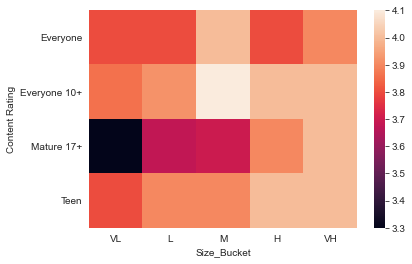

In [102]:
sns.heatmap(res)
plt.show()

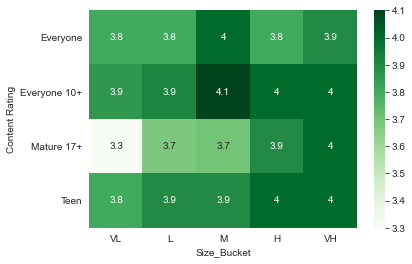

In [103]:
sns.heatmap(res,cmap='Greens',annot=True)
plt.show()

### Analyse the rating by month

In [104]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [105]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [106]:
inp1['updated_month']=pd.to_datetime(inp1['Last Updated']).dt.month

In [107]:
inp1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

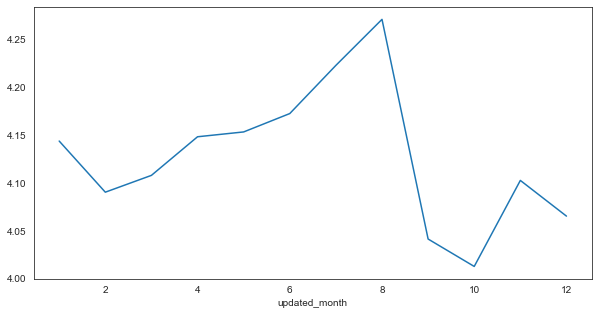

In [108]:
plt.figure(figsize=[10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

In [109]:
pd.pivot_table(data=inp1,values="Installs",index="updated_month",columns="Content Rating",aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1861067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,7771109680,456556000,419491910,1943556800
8,5930943320,215821000,312981700,1257855650
9,260340410,24931100,2201010,22483100


In [110]:
monthly = pd.pivot_table(data=inp1,values="Installs",index="updated_month",columns="Content Rating",aggfunc=sum)

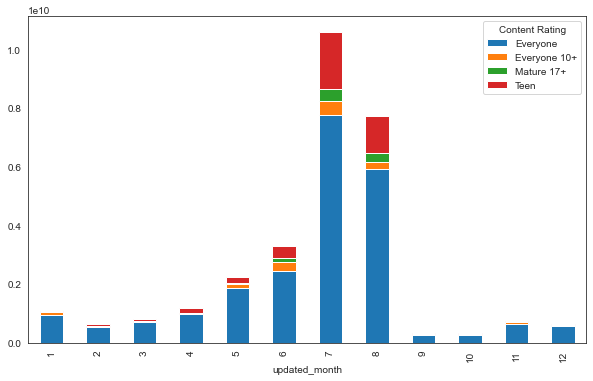

In [111]:
monthly.plot(kind="bar",stacked=True,figsize=[10,6])
plt.show()

Get proportion/perc instead of absolute value

In [112]:
monthly_perc = monthly[['Everyone','Everyone 10+','Mature 17+','Teen']].apply(lambda x: x/x.sum(),axis=1)

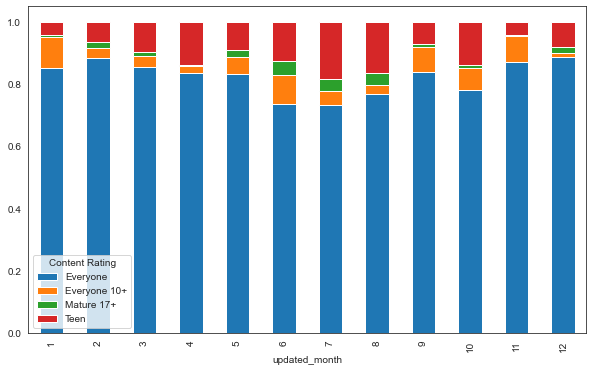

In [113]:
monthly_perc.plot(kind="bar",stacked=True,figsize=[10,6])
plt.show()

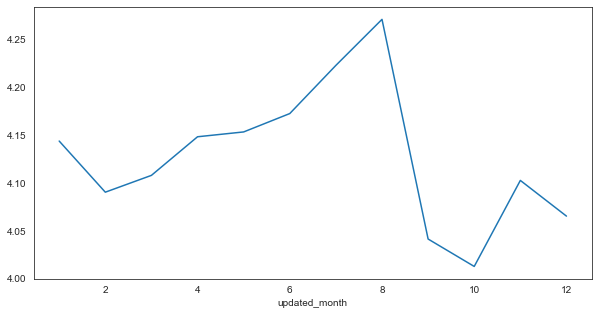

In [114]:
plt.figure(figsize=[10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()